In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages(c("tidyverse", "survival", "ggsurvfit", "gtsummary", "survminer"), repos='http://cran.us.r-project.org')

library(tidyverse)     # для удобной работы с таблицами
library(survival)      # для анализа выживаемости
library(ggsurvfit)     # красивые графики выживаемости
library(gtsummary)     # таблицы с результатами
library(survminer)     # визуализация с p-value, рисками и др.


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘V8’, ‘litedown’, ‘reactR’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘bigD’, ‘bitops’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘patchwork’, ‘cards’, ‘gt’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’

trying URL 'http://cran.us.r-project.org/src/contrib/rbibutils_2.3.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Deriv_4.1.6.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/Rdpack_2.6.4.tar.gz'
trying URL 'http://cran.us.r-project.or

In [3]:
%%R
install.packages("cardx", repos = "https://cloud.r-project.org")
library(cardx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/cardx_0.2.4.tar.gz'
Content type 'application/x-gzip' length 185685 bytes (181 KB)
downloaded 181 KB


The downloaded source packages are in
	‘/tmp/RtmpWH1Sqh/downloaded_packages’


In [4]:
%%R
install.packages("readr", repos='http://cran.us.r-project.org')
install.packages("dplyr", repos='http://cran.us.r-project.org')
install.packages("ggplot2", repos='http://cran.us.r-project.org')

# Загрузка библиотек
library(readr)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/readr_2.1.5.tar.gz'
Content type 'application/x-gzip' length 298065 bytes (291 KB)
downloaded 291 KB


The downloaded source packages are in
	‘/tmp/RtmpWH1Sqh/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpWH1Sqh/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpWH1Sqh/downloaded_packages’


#1: Загрузка данных

In [5]:
%%R
# Распакуем архив
unzip("proj_data.zip", exdir = "proj_data")

In [6]:
%%R
# Загрузим таблицы
clinical <- read_tsv("proj_data/proj_data/clinical.tsv")
family <- read_tsv("proj_data/proj_data/family_history.tsv")
exposure <- read_tsv("proj_data/proj_data/exposure.tsv")
pathology <- read_tsv("proj_data/proj_data/pathology_detail.tsv")
followup <- read_tsv("proj_data/proj_data/follow_up.tsv")

New names:
• `residual_disease` -> `residual_disease...118`
• `residual_disease` -> `residual_disease...189`
Rows: 1745 Columns: 210
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (210): case_id, case_submitter_id, project_id, age_at_index, age_is_obfu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 46 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): case_id, case_submitter_id, project_id, relationship_age_at_diagno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 401 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): case_id, case_submitter_id, project_id, age_at_last_e

#2: Интеграция (объединение данных)

In [64]:
%%R
table(duplicated(pathology$case_submitter_id))  # TRUE — значит дубли есть


FALSE  TRUE 
  122     4 


In [65]:
%%R
table(duplicated(followup$case_submitter_id))


FALSE  TRUE 
  204   102 


In [66]:
%%R
# Оставляем по 1 строке на пациента
pathology_single <- pathology %>% group_by(case_submitter_id) %>% slice(1)
followup_single <- followup %>% group_by(case_submitter_id) %>% slice(1)

# Новый join без предупреждений
merged <- clinical %>%
  left_join(family, by = "case_submitter_id") %>%
  left_join(exposure, by = "case_submitter_id") %>%
  left_join(pathology_single, by = "case_submitter_id") %>%
  left_join(followup_single, by = "case_submitter_id")



#3: Фильтрация пациентов с раком поджелудочной железы

In [90]:
%%R
names(merged)


  [1] "case_id.x"                               
  [2] "case_submitter_id"                       
  [3] "project_id.x"                            
  [4] "age_at_index"                            
  [5] "age_is_obfuscated"                       
  [6] "cause_of_death"                          
  [7] "cause_of_death_source"                   
  [8] "country_of_birth"                        
  [9] "country_of_residence_at_enrollment"      
 [10] "days_to_birth"                           
 [11] "days_to_death"                           
 [12] "education_level"                         
 [13] "ethnicity"                               
 [14] "gender"                                  
 [15] "marital_status"                          
 [16] "occupation_duration_years.x"             
 [17] "premature_at_birth"                      
 [18] "race"                                    
 [19] "vital_status"                            
 [20] "weeks_gestation_at_birth"                
 [21] "year_of_birth

In [91]:
%%R
# Посмотрим уникальные диагнозы
unique(merged$primary_diagnosis)

 [1] "Duct adenocarcinoma, NOS"                          
 [2] "Carcinoma, NOS"                                    
 [3] "Neuroendocrine carcinoma, NOS"                     
 [4] "Infiltrating duct carcinoma, NOS"                  
 [5] "Adenocarcinoma, NOS"                               
 [6] "Unknown"                                           
 [7] "Solid pseudopapillary tumor"                       
 [8] "Mucinous adenocarcinoma"                           
 [9] "Adenocarcinoma, metastatic, NOS"                   
[10] "Acinar cell carcinoma"                             
[11] "Adenocarcinoma with mixed subtypes"                
[12] "Intraductal papillary-mucinous carcinoma, invasive"
[13] "Not Reported"                                      
[14] "Carcinoma, undifferentiated, NOS"                  


In [92]:
%%R
unique(merged$icd_10_code)


 [1] "'--"   "C25.9" "C25.0" "C25.2" "C25.1" "C78.7" "C78.2" "C25.3" "C25.8"
[10] "C78.6" "C77.0"


In [93]:
%%R
unique(merged$tissue_or_organ_of_origin)


[1] "Pancreas, NOS"                  "Head of pancreas"              
[3] "Tail of pancreas"               "Body of pancreas"              
[5] "Overlapping lesion of pancreas" "Not Reported"                  
[7] "Breast, NOS"                   


In [94]:
%%R
unique(merged$site_of_resection_or_biopsy)


 [1] "Abdomen, NOS"                                             
 [2] "Not Reported"                                             
 [3] "Liver"                                                    
 [4] "Pancreas, NOS"                                            
 [5] "Head of pancreas"                                         
 [6] "Body of pancreas"                                         
 [7] "Tail of pancreas"                                         
 [8] "Lung, NOS"                                                
 [9] "Extrahepatic bile duct"                                   
[10] "Lymph node, NOS"                                          
[11] "Specified parts of peritoneum"                            
[12] "Duodenum"                                                 
[13] "Connective, subcutaneous and other soft tissues, NOS"     
[14] "Stomach, NOS"                                             
[15] "Pleura, NOS"                                              
[16] "Pancreatic duct"   

In [95]:
%%R

# Фильтрация: pancreas или pancreatic встречается в любом из полей, ИСПРАВЛЕННО
pancreatic <- merged %>%
  filter(
    (!is.na(primary_diagnosis) & grepl("pancreas|pancreatic", tolower(primary_diagnosis))) |
    (!is.na(tissue_or_organ_of_origin) & grepl("pancreas", tolower(tissue_or_organ_of_origin))) |
    (!is.na(site_of_resection_or_biopsy) & grepl("pancreas", tolower(site_of_resection_or_biopsy))) |
    (!is.na(icd_10_code) & grepl("^C25", icd_10_code))
  )



In [96]:
# пациентов с раком поджелудочной железы
%%R
cat("Пациентов с раком поджелудочной железы: ",nrow(pancreatic), "\n")

Пациентов с раком поджелудочной железы:  1744 


In [97]:
%%R
# Создаём новую колонку diagnosis с приоритетом по полям
pancreatic <- pancreatic %>%
  mutate(
    diagnosis = coalesce(
      primary_diagnosis,
      tissue_or_organ_of_origin,
      site_of_resection_or_biopsy,
      icd_10_code
    )
  )


In [98]:
%%R
# Проверим что diagnosis не содержит NA
sum(is.na(pancreatic$diagnosis))  # должно быть 0

[1] 0


In [99]:
%%R

# Посмотрим первые значения
head(pancreatic$diagnosis, 10)


 [1] "Duct adenocarcinoma, NOS"         "Duct adenocarcinoma, NOS"        
 [3] "Duct adenocarcinoma, NOS"         "Carcinoma, NOS"                  
 [5] "Neuroendocrine carcinoma, NOS"    "Carcinoma, NOS"                  
 [7] "Infiltrating duct carcinoma, NOS" "Infiltrating duct carcinoma, NOS"
 [9] "Neuroendocrine carcinoma, NOS"    "Adenocarcinoma, NOS"             


#4: Описательные статистики

In [100]:
%%R
# Смотрим структуру данных
str(pancreatic)

tibble [1,744 × 476] (S3: tbl_df/tbl/data.frame)
 $ case_id.x                               : chr [1:1744] "00061f34-c891-4f9c-b8d6-3ca68b98c875" "0035b612-8955-4da5-a35d-bced5b32cbec" "008147fd-3235-4bab-b816-7589590959d1" "00f67c2e-b77f-4082-907c-1dd4ea418f14" ...
 $ case_submitter_id                       : chr [1:1744] "AD1348" "AD258" "AD10836" "AD12672" ...
 $ project_id.x                            : chr [1:1744] "FM-AD" "FM-AD" "FM-AD" "FM-AD" ...
 $ age_at_index                            : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ age_is_obfuscated                       : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ cause_of_death                          : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ cause_of_death_source                   : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ country_of_birth                        : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ country_of_residence_at_enrollment      : chr [1:1744] "'--" "'--" "'--" "'--" ...
 $ days_to_birth        

In [101]:
%%R
# Основные статистики по возрасту и т.п.
summary(pancreatic)

  case_id.x         case_submitter_id  project_id.x       age_at_index      
 Length:1744        Length:1744        Length:1744        Length:1744       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 age_is_obfuscated  cause_of_death     cause_of_death_source country_of_birth  
 Length:1744        Length:1744        Length:1744           Length:1744       
 Class :character   Class :character   Class :character      Class :character  
 Mode  :character   Mode  :character   Mode  :character      Mode  :character  
 country_of_residence_at_enrollment days_to_birth      days_to_death     
 Length:1744                        Length:1744        Length:1744       
 Class :character                   Class :character   Class :character  
 Mode  :character                   Mode  :character   Mode  :character  
 education_level     ethnicity            gender          marital_status    

#Очистка и подготовка переменных для анализа выживаемости

In [102]:
%%R
# Заменим '--' на NA
pancreatic[pancreatic == "'--"] <- NA

# Преобразуем переменные
pancreatic <- pancreatic %>%
  mutate(
    time = as.numeric(days_to_death),
    vital_status = ifelse(vital_status == "Dead", 1,
                   ifelse(vital_status == "Alive", 0, NA)),
    age_at_diagnosis = as.numeric(age_at_diagnosis)
  )

# Удалим NA в переменных времени и статуса
surv_data <- pancreatic %>%
  filter(!is.na(days_to_death), !is.na(vital_status))

In [103]:
%%R
# Частоты категориальных переменных
table(pancreatic$gender)


     female        male     unknown unspecified 
        833         909           1           1 


In [104]:
%%R
table(pancreatic$race)


                    asian black or african american              not reported 
                       56                        30                       932 
                    other                   Unknown                     white 
                       41                        18                       667 


#5: Проверка гипотез (гендер и диагноз)

In [105]:
%%R
# Удалим строки-пустышки
surv_data <- surv_data %>%
  filter(!is.na(days_to_death), !is.na(vital_status))

# Принудительно переведём в числовой формат
surv_data$days_to_death <- as.numeric(surv_data$days_to_death)
surv_data$vital_status <- as.numeric(surv_data$vital_status)

In [112]:
%%R
# Таблица сопряжённости и тест Fisher
table_gender <- table(surv_data$gender, surv_data$diagnosis)
fisher.test(table_gender)



	Fisher's Exact Test for Count Data

data:  table_gender
p-value = 0.05679
alternative hypothesis: two.sided



#Вывод:

p-value = 0.05679

Это немного больше 0.05 → значит, на уровне значимости 5% мы не отвергаем нулевую гипотезу.

Интерпретация:
Нулевая гипотеза (H₀): пол и диагноз независимы

Альтернативная (H₁): между полом и диагнозом есть связь

В данных нет статистически значимой связи между полом и типом диагноза, но p-value близко к порогу — возможно, есть тенденция (особенно если увеличить выборку).

#6: Анализ выживаемости по полу

In [107]:
%%R
# Создаём объект Surv (время + статус)
# Обычно status: 1 - умер, 0 - жив
# time: например, days_to_death или days_to_last_follow_up

# Посмотрим, какие переменные доступны:
names(surv_data)

  [1] "case_id.x"                               
  [2] "case_submitter_id"                       
  [3] "project_id.x"                            
  [4] "age_at_index"                            
  [5] "age_is_obfuscated"                       
  [6] "cause_of_death"                          
  [7] "cause_of_death_source"                   
  [8] "country_of_birth"                        
  [9] "country_of_residence_at_enrollment"      
 [10] "days_to_birth"                           
 [11] "days_to_death"                           
 [12] "education_level"                         
 [13] "ethnicity"                               
 [14] "gender"                                  
 [15] "marital_status"                          
 [16] "occupation_duration_years.x"             
 [17] "premature_at_birth"                      
 [18] "race"                                    
 [19] "vital_status"                            
 [20] "weeks_gestation_at_birth"                
 [21] "year_of_birth

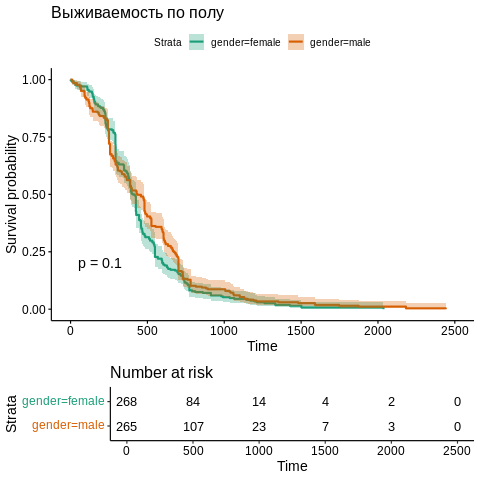

In [108]:
%%R

# Создаём объект Surv
surv_obj <- Surv(time = surv_data$days_to_death, event = surv_data$vital_status)

# Модель выживания по полу
fit_gender <- survfit(surv_obj ~ gender, data = surv_data)

# Визуализация
ggsurvplot(fit_gender,
           data = surv_data,
           pval = TRUE,
           conf.int = TRUE,
           risk.table = TRUE,
           palette = "Dark2",
           title = "Выживаемость по полу")

#8: Проверка гипотез (пол vs классификация опухоли)

In [113]:

%%R
# Таблица сопряжённости и тест Fisher
table_gender_class <- table(surv_data$gender, surv_data$classification_of_tumor)
fisher.test(table_gender_class)



	Fisher's Exact Test for Count Data

data:  table_gender_class
p-value = 0.5377
alternative hypothesis: two.sided



#Вывод:

p-value = 0.5377

Интерпретация:
Это значение больше 0.05 ⇒ нет статистически значимой связи между полом и типом опухоли в этой выборке.

То есть, распределение типа опухоли не зависит от того, мужчина это или женщина.

#7: Анализ выживаемости по классификации опухоли

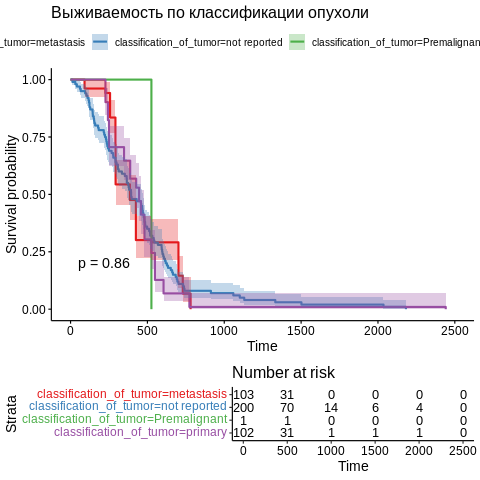

In [111]:
%%R
# Модель выживания
fit_class <- survfit(surv_obj ~ classification_of_tumor, data = surv_data)

ggsurvplot(fit_class,
           data = surv_data,
           pval = TRUE,
           conf.int = TRUE,
           risk.table = TRUE,
           palette = "Set1",
           title = "Выживаемость по классификации опухоли")
